In [5]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/home/agastya/miniforge3/lib/python3.10/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [109]:
from fastai.vision.all import *

In [4]:
%%capture
!pip install duckduckgo-search nbdev

In [1]:
# Creating search function
from duckduckgo_search import ddg_images

def search_images(term, max_items = 30):
    print(f'{term} images')
    return L(ddg_images(term, max_results = max_items, color = 'Monochrome'))
                        # , size = 'large', type_image='photo'))

In [7]:
# Setting Current Notebook Directory as Path
path = Path('.').cwd()/'dataset'
path

Path('/home/agastya/notebooks/FastAI-course/self-implementation/02-mandarin-japaenese-classifier/dataset')

In [8]:
# Testing single image
from fastbook import *
test_mandarin = search_images('mandarin text', 1).itemgot('image')[0]
print(test_mandarin)
download_url(test_mandarin, path/'mandarin/test.png')

mandarin text images


/home/agastya/miniforge3/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


http://csa-eur.nl/wp-content/uploads/2015/08/mandarin-chinese-text.jpg


Path('/home/agastya/notebooks/FastAI-course/self-implementation/02-mandarin-japaenese-classifier/dataset/mandarin/test.png')

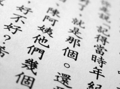

In [9]:
im = Image.open(path/'mandarin/test.png')
im.to_thumb(120)

In [156]:
# Search Images
n = 100
mandarin_images = search_images('mandarin texts', n).itemgot('image')
japanese_images = search_images('japanese texts', n).itemgot('image')
mandarin_images

mandarin texts images


/home/agastya/miniforge3/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


japanese texts images


(#90) ['https://1.bp.blogspot.com/-GMeObo1DqfI/Uyb8Gmf2OnI/AAAAAAAAAUY/c-OtRySzb5g/s1600/mandarin-chinese-text.jpg','https://shwestrick.github.io/assets/mandarin/pages/mandarin - page 2.png','https://shwestrick.github.io/assets/mandarin/pages/mandarin - page 24.png','https://static.turbosquid.com/Preview/2017/10/22__16_57_41/Mandarin1set.jpg7585E747-A8CB-42C6-949E-5B74506EE1BCLarge.jpg','https://www.omniglot.com/images/langsamples/udhr_chinese_zhuyin.gif','https://i.pinimg.com/originals/83/46/32/834632fba80ab27041f3dbaf8b187bce.png','https://media.fontsgeek.com/generated/m/a/mandarin-regular-charmap.png','https://shwestrick.github.io/assets/mandarin/summary/mandarin summary - page 1.png','https://oppidanlibrary.com/wp-content/uploads/2017/04/Mandarin-Letters-Pattern.gif','https://shwestrick.github.io/assets/mandarin/pages/mandarin - page 6.png'...]

In [157]:
# Download and refresh images
import shutil
if path.exists():
    shutil.rmtree(path)

path.mkdir()
download_images(path/'mandarin', urls = mandarin_images)
download_images(path/'japanese', urls = japanese_images)

In [158]:
# Clean up any other file type which were downloaded
def delete_otherImage_formats(folder_name:str):
    files = [f for f in os.listdir(path/folder_name)]
    for f in files:
        if f.endswith(('jpg', 'png', 'jpeg')):
            pass
        else:
            os.remove(path/folder_name/f)

delete_otherImage_formats('mandarin')

In [159]:
print('Mandarin Images')
mandarin_files = [f for f in os.listdir(path/'mandarin')]
print(mandarin_files)

Mandarin Images
['90148800-0025-4253-8063-2ec5f0b8c9b0.png', '03bdff83-1a2d-48d4-9344-28306ab43abc.jpg', '87cb94d5-8dd7-4eb3-912b-979f9cbc9926.jpg', '3128e666-8f48-4eb4-8d6b-f0f9b5ba3b7f.jpg', '880f9e0e-20c2-4327-b9d2-e087c3ab5735.png', '490653df-22ad-465c-9f51-adf6e5c4c490.png', 'b78b7ea7-babf-4e32-af6a-6075c1260a91.jpeg', '576d2b85-8053-4c8f-a40e-37951a3ec4fb.jpg', 'c8d5781b-9579-4951-97b0-764138262e96.jpg', 'eaf50a63-9fc3-4d73-8ebc-000dc7c80004.png', 'd6c3a929-89d8-417e-ba06-db17b0de4bc1.png', '4fe6fa62-917b-42ed-ada2-a09d72e50148.png', 'd39c48e6-cdd6-4d16-88e6-db6844e448c8.jpg', '9bb0fca5-790d-43f9-bd76-2058d345c961.jpg', '82ab7cb4-53cc-47b9-973c-59b511a6ff4a.jpg', '5785fb53-ea9a-4379-a9ba-cd0acd0dc288.jpg', 'd14b036e-bb3a-4f17-9a3c-885225c81f19.png', '70c0a231-a985-41bf-bcc5-f549dbedf234.jpg', '8320355e-4fbb-4482-a5b1-93a28ba33bf5.jpg', '7470e0a5-5db1-4f6d-97ac-46c2afba2461.jpg', 'a367bb28-fc2d-4be9-974c-c797316b552e.jpg', '605a75e2-833a-48f2-aad5-de0b16717b8b.jpg', '20d5d453-4522

In [160]:
print('Japanese Images')
delete_otherImage_formats('japanese')
[f for f in os.listdir(path/'japanese')]

Japanese Images


['12aa7d64-4c8c-4c66-bfa7-1c5d80cb8d24.png',
 'f812827e-c0bc-4670-9eb1-cd2ccaf5b952.png',
 '87e72e58-45dd-4465-ab48-cee4692498bc.jpg',
 '121ffc8b-ba5b-4ef7-8daf-b89143b4d0b6.jpg',
 '4c4b8fbf-2789-429c-83ac-b828347d4a93.jpg',
 'dedfdd35-5a60-4644-9159-d330b4dceb3e.jpg',
 '6c02acd9-082f-41f8-b47d-f145dc4e1d1b.png',
 '484eb37c-37fd-4188-bc2d-cafea71d0ddd.jpg',
 'a80f9102-5a53-4755-b5e9-5c7e22b9d814.png',
 '796336ec-5c41-4099-b1c3-2e022f0a1749.jpg',
 'b76dabfa-fe5e-40b1-8d20-b4e939191a12.jpg',
 '728bbe0f-e847-4adf-8907-80f0621fbcf3.jpg',
 '90501e38-a4ba-4a7b-b53b-71590b016dd1.png',
 '38c4961d-c639-4ae1-8dd2-8c8020c105f1.png',
 '4e36bd03-9a5d-485f-8cc9-24e80cefa4fe.jpg',
 '6e3db8d7-e793-4e98-8223-bab047d85621.png',
 '94e2c0b6-a180-4ec4-9c13-5c126694d416.png',
 '59cc0b23-22ea-4fd1-92fa-3243595e5b52.jpg',
 '30093c3f-1f9e-4545-9f74-0c16c30ac48b.png',
 '06dfec77-2c85-47b9-af87-ace6f9af4861.jpg',
 '8d20b848-1a8d-4d9b-9705-88be89bcb8c6.jpg',
 'c42c77a1-f30e-41e0-b650-3484e665fd90.jpg',
 'ccdb662d

In [43]:
print(get_image_files)
doc(get_image_files)

<function get_image_files at 0x7fc0ee410f70>


In [169]:
fns = get_image_files(path)
failed = verify_images(fns)

In [170]:
failed.map(Path.unlink)

(#2) [None,None]

In [176]:
# Creating a datablock
languages = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(200, min_scale = 2), batch_tfms=aug_transforms(mult=1.1)
)

In [177]:
dls = languages.dataloaders(path, bs = 10)

29


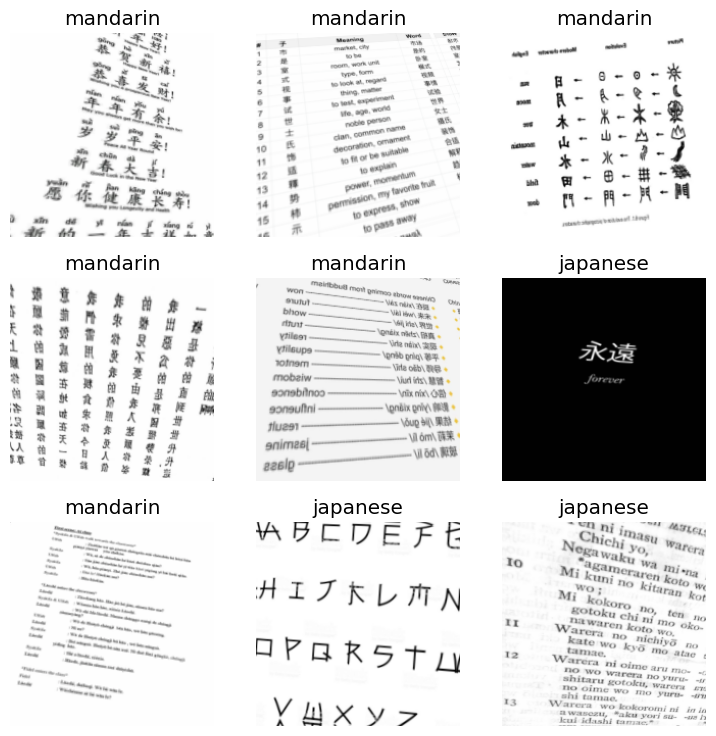

In [178]:
print(len(dls.valid.dataset))
dls.train.show_batch()

120


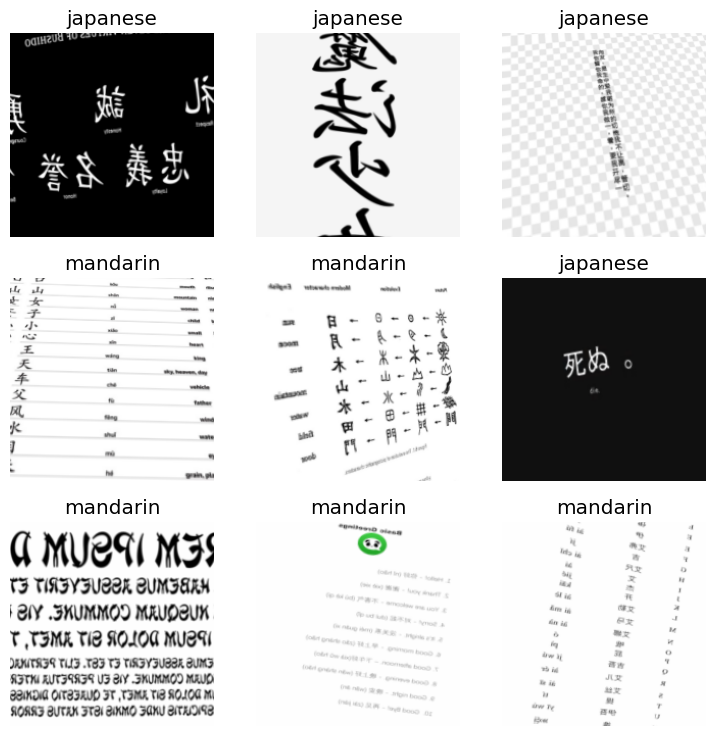

In [180]:
print(len(dls.train.dataset))
dls.train.show_batch()

In [181]:
# Training Model
learner = vision_learner(dls, resnet34, metrics = error_rate)
learner.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.043285,1.359533,0.413793,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.759000,1.362831,0.379310,00:02
1,0.694420,1.614968,0.344828,00:02
2,0.675230,1.262548,0.310345,00:02
3,0.674933,1.361268,0.344828,00:02
4,0.595558,1.383708,0.413793,00:02


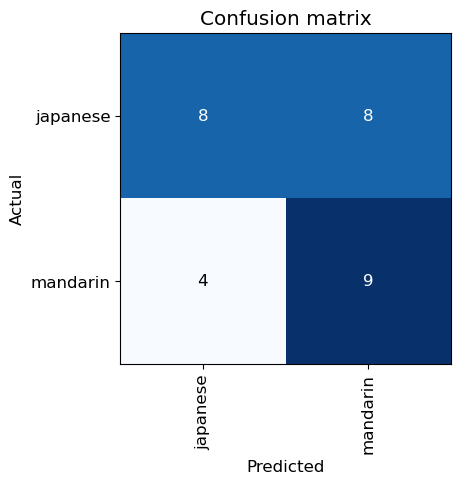

In [182]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()